In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ksdjhfsd.csv" , sep=";")

In [3]:
df.head()

,year,gender,study_level,major,ai_usage_frequency,primary_ai_use,academic_integrity_training,study_hours_week,ai_hours_week,attendance_rate,assignment_completion_rate,exam_score,gpa
0,2025,female,phd,social sciences,never,studying/flashcards,yes,20.60,2.4,92.7,96.50,99.1,4.00
1,2024,male,undergraduate,engineering,daily,coding help,yes,25.80,6.9,87.0,79.50,99.5,3.98
2,2023,female,undergraduate,engineering,weekly,writing support,yes,22.70,8.4,94.1,81.90,94.3,3.67
3,2023,male,undergraduate,engineering,weekly,concept explanation,yes,18.89,4.1,83.0,86.01,71.0,3.05
4,2023,female,masters,social sciences,weekly,writing support,yes,13.50,3.0,89.0,75.90,82.6,3.58


In [4]:
df["major"].value_counts()

engineering         381
business            292
social sciences     267
computer science    252
health sciences     184
arts humanities     130
education            95
Name: major, dtype: int64

In [5]:
df["ai_usage_frequency"].value_counts()

weekly    751
daily     605
rarely    172
never      73
Name: ai_usage_frequency, dtype: int64

In [6]:
df["ai_hours_week"].describe().round(2)

count    1601.00
mean        4.57
std         2.42
min         0.00
25%         2.80
50%         4.50
75%         6.40
max        11.00
Name: ai_hours_week, dtype: float64

In [7]:
df["study_hours_week"].describe().round(2)

count    1601.00
mean       18.79
std         6.01
min         2.20
25%        14.60
50%        18.65
75%        22.70
max        35.00
Name: study_hours_week, dtype: float64

In [8]:
df["assignment_completion_rate"].describe()

count    1601.000000
mean       86.125653
std         8.386048
min        63.300000
25%        80.400000
50%        86.400000
75%        92.400000
max       100.000000
Name: assignment_completion_rate, dtype: float64

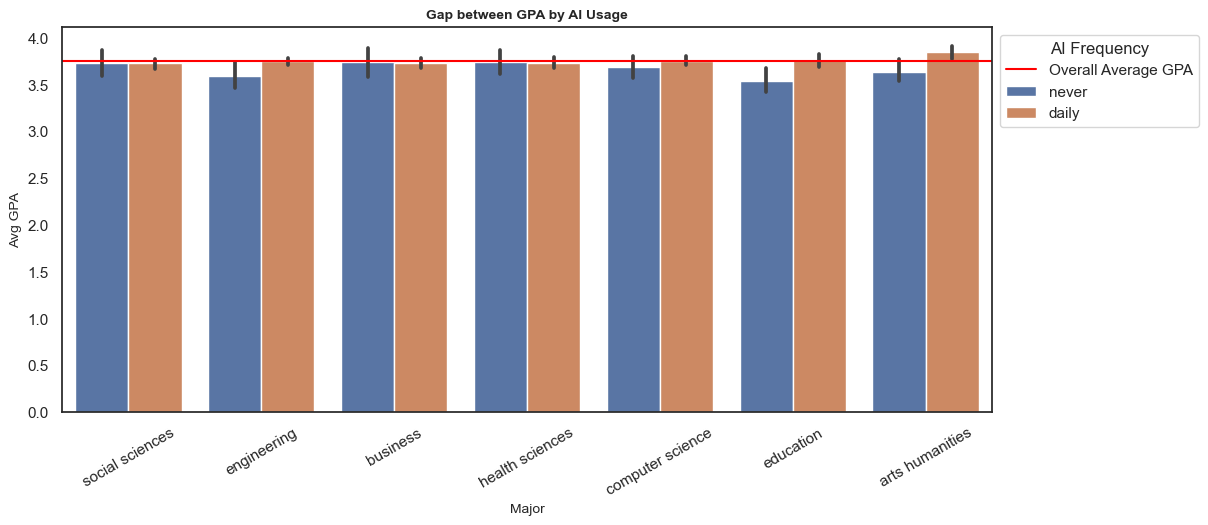

In [9]:
filtered = df[df["ai_usage_frequency"].isin(["never", "daily"])]
sns.set_theme(style="white")
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=filtered, x="major", y="gpa", 
    hue="ai_usage_frequency")

plt.axhline(df["gpa"].mean(), color="red", linestyle="-", label="Overall Average GPA")
plt.title("Gap between GPA by AI Usage", fontsize=10, fontweight="bold")
plt.xlabel("Major", fontsize=10)
plt.ylabel("Avg GPA", fontsize=10)
plt.xticks(rotation=30)
plt.legend(title="AI Frequency", bbox_to_anchor=(1, 1))
plt.savefig("asdas")
plt.show()

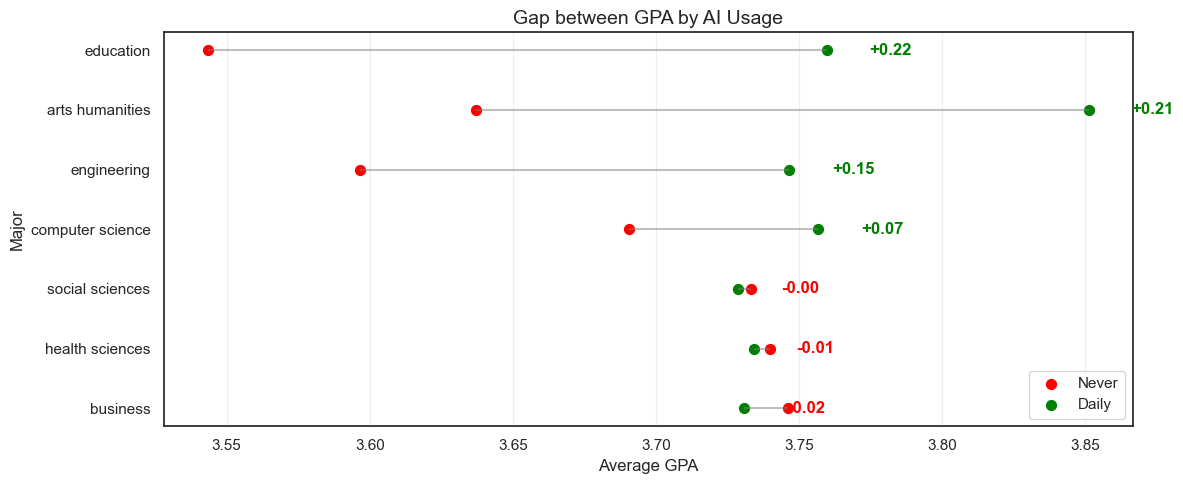

In [10]:
#Create a pivot talbe isted ofgroupby lines.
table = df.pivot_table(index="major", columns="ai_usage_frequency", values="gpa")
#Filtering never and daily and calculating their difference
table = table[["never", "daily"]]
table["diff"] = table["daily"] - table["never"]
#Sorting
table = table.sort_values(by="diff")
#creating visulization
plt.figure(figsize=(12, 5))
#Drawing never and daily dots and coloring them
plt.scatter(table["never"], table.index, color="red", label="Never", s=50)
plt.scatter(table["daily"], table.index, color="green", label="Daily",s =50)
#drawing line between never and daily dots
plt.hlines(y=table.index, xmin=table["never"], xmax=table["daily"], color="grey", alpha=0.5)
#Addiing text to show difference between gpas
for i in table.index:
    val = table.loc[i, "diff"]
    plt.text(table.loc[i, "daily"] + 0.015, i, f"{val:+.2f}", 
             va="center", fontweight="bold", color="green" if val > 0 else "red")

#Formatting
plt.title("Gap between GPA by AI Usage", fontsize=14)
plt.xlabel("Average GPA")
plt.ylabel("Major")
plt.legend(loc="lower right")
plt.grid(axis="x", linestyle="-", alpha=0.3)
plt.tight_layout()
plt.savefig("sssaaaasss")
plt.show()